# Statistical visualizations with `seaborn`

*adapted from [Seaborn Tutorials](https://seaborn.pydata.org/tutorial.html)*

In the previous lab you learned about using `matplotlib` to create and modify plots in Python. 

Today we're going to look at [Seaborn](https://seaborn.pydata.org/index.html), a plotting library built *on top of* `matplotlib`, designed for making **statistical visualizations**

Seaborn helps you explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots. Its dataset-oriented, declarative API lets you focus on what the different elements of your plots mean, rather than on the details of how to draw them.

At the same time you can always take what you've learned about customizing a figure in `matplotlib` and apply it to any plot generated by `seaborn`!

## Introductory Overview

Here’s an example of what seaborn can do:

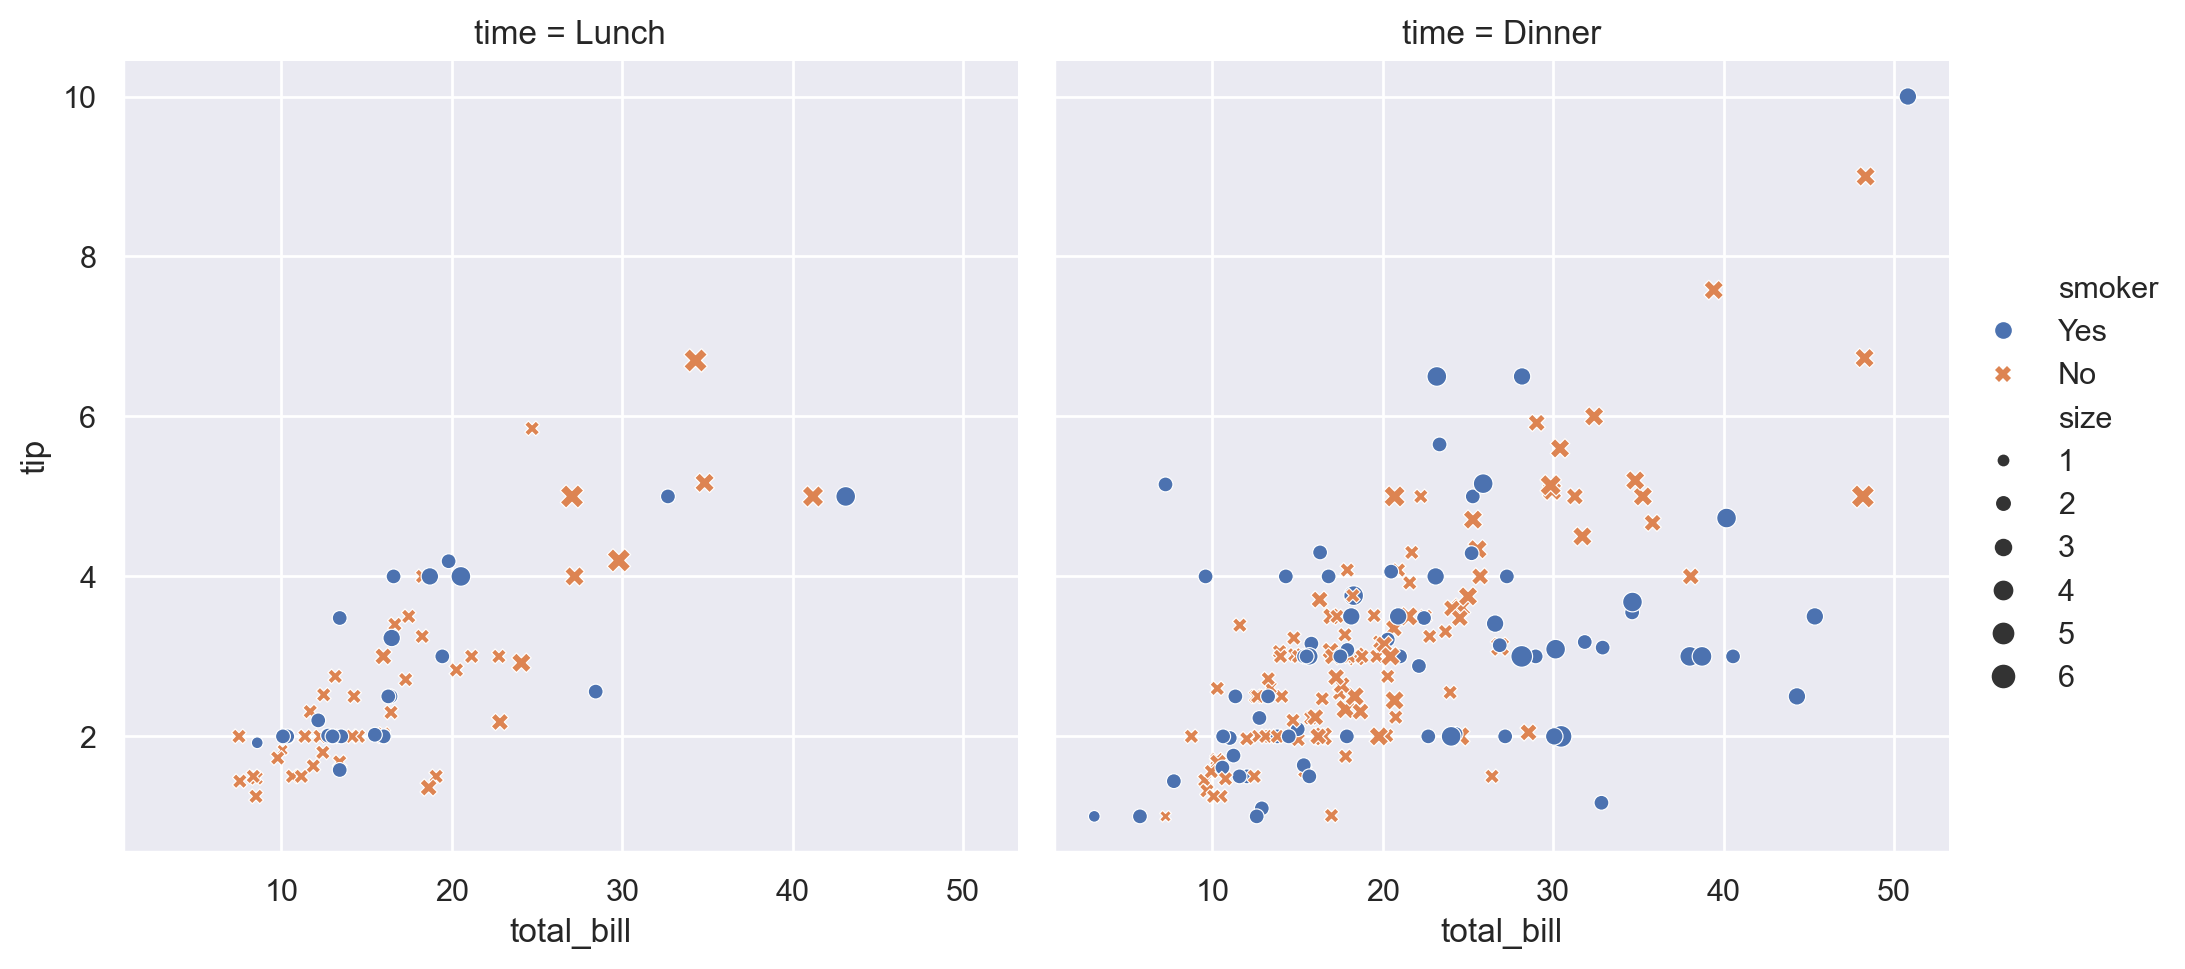

In [1]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

A few things have happened here. Let's go through them one by one:

In [ ]:
# Import seaborn
import seaborn as sns

Seaborn is the only library we need to import for this simple example. By convention, it is imported with the shorthand ``sns``.

Behind the scenes, seaborn uses matplotlib to draw its plots.

In [ ]:
# Apply the default theme
sns.set_theme()

This uses the [matplotlib rcParam system](https://matplotlib.org/stable/users/explain/customizing.html) and will affect how all matplotlib plots look, even if you don't make them with seaborn. Beyond the default theme, there are [several other options](https://seaborn.pydata.org/tutorial/aesthetics.html), and you can independently control the style and scaling of the plot to quickly translate your work between presentation contexts (e.g., making a version of your figure that will have readable fonts when projected during a talk). If you like the matplotlib defaults or prefer a different theme, you can skip this step and still use the seaborn plotting functions.

In [5]:
# Load an example dataset
tips = sns.load_dataset("tips")

tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

**Note** Most code on the official Seaborn documentation the [`load_dataset`]() function to get quick access to an example dataset. These datasets are provided as `pandas` DataFrames.

Since we're using Polars in this course you can easily convert between the two if you run into issues with `seaborn` or other libraries:

In [6]:
# Pandas -> Polars
import polars as pl

tips_polars = pl.DataFrame(tips)
tips_polars

shape: (244, 7)
┌────────────┬──────┬────────┬────────┬──────┬────────┬──────┐
│ total_bill ┆ tip  ┆ sex    ┆ smoker ┆ day  ┆ time   ┆ size │
│ ---        ┆ ---  ┆ ---    ┆ ---    ┆ ---  ┆ ---    ┆ ---  │
│ f64        ┆ f64  ┆ cat    ┆ cat    ┆ cat  ┆ cat    ┆ i64  │
╞════════════╪══════╪════════╪════════╪══════╪════════╪══════╡
│ 16.99      ┆ 1.01 ┆ Female ┆ No     ┆ Sun  ┆ Dinner ┆ 2    │
│ 10.34      ┆ 1.66 ┆ Male   ┆ No     ┆ Sun  ┆ Dinner ┆ 3    │
│ 21.01      ┆ 3.5  ┆ Male   ┆ No     ┆ Sun  ┆ Dinner ┆ 3    │
│ 23.68      ┆ 3.31 ┆ Male   ┆ No     ┆ Sun  ┆ Dinner ┆ 2    │
│ 24.59      ┆ 3.61 ┆ Female ┆ No     ┆ Sun  ┆ Dinner ┆ 4    │
│ …          ┆ …    ┆ …      ┆ …      ┆ …    ┆ …      ┆ …    │
│ 29.03      ┆ 5.92 ┆ Male   ┆ No     ┆ Sat  ┆ Dinner ┆ 3    │
│ 27.18      ┆ 2.0  ┆ Female ┆ Yes    ┆ Sat  ┆ Dinner ┆ 2    │
│ 22.67      ┆ 2.0  ┆ Male   ┆ Yes    ┆ Sat  ┆ Dinner ┆ 2    │
│ 17.82      ┆ 1.75 ┆ Male   ┆ No     ┆ Sat  ┆ Dinner ┆ 2    │
│ 18.78      ┆ 3.0  ┆ Female ┆ No     ┆ Thur ┆ Dinner ┆ 2    │
└────────────┴──────┴────────┴────────┴──────┴────────┴──────┘

In [8]:
# Polars -> Pandas
tips_polars_pandas = tips_polars.to_pandas()

tips_polars_pandas

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [ ]:
tips_polars_pandas.equals(tips) # True

Returning to the example code we finally had:

In [ ]:
# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

This plot shows the relationship between five variables in the tips dataset using a single call to the seaborn function [`sns.relplot()`](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot). Notice how we provided only the names of the variables and their roles in the plot. Unlike when using matplotlib directly, it wasn't necessary to specify attributes of the plot elements in terms of the color values or marker codes. Behind the scenes, seaborn handled the translation from columns in the dataframe to arguments that matplotlib understands. 

This **declarative approach**, similar to `ggplot` in R, lets you stay focused on the questions that you want to answer, rather than on the details of how to control matplotlib.


## A high-level API for statistical graphics

There is no universally best way to visualize data. Different questions are best answered by different plots. Seaborn makes it easy to switch between different visual representations by using a consistent dataset-oriented API.

The function `sns.relplot()` is named that way because it is designed to visualize many different statistical *relationships*. While scatter plots are often effective, relationships where one variable represents a measure of time are better represented by a line. The `relplot` function has a convenient `kind` parameter that lets you easily switch to this alternate representation:

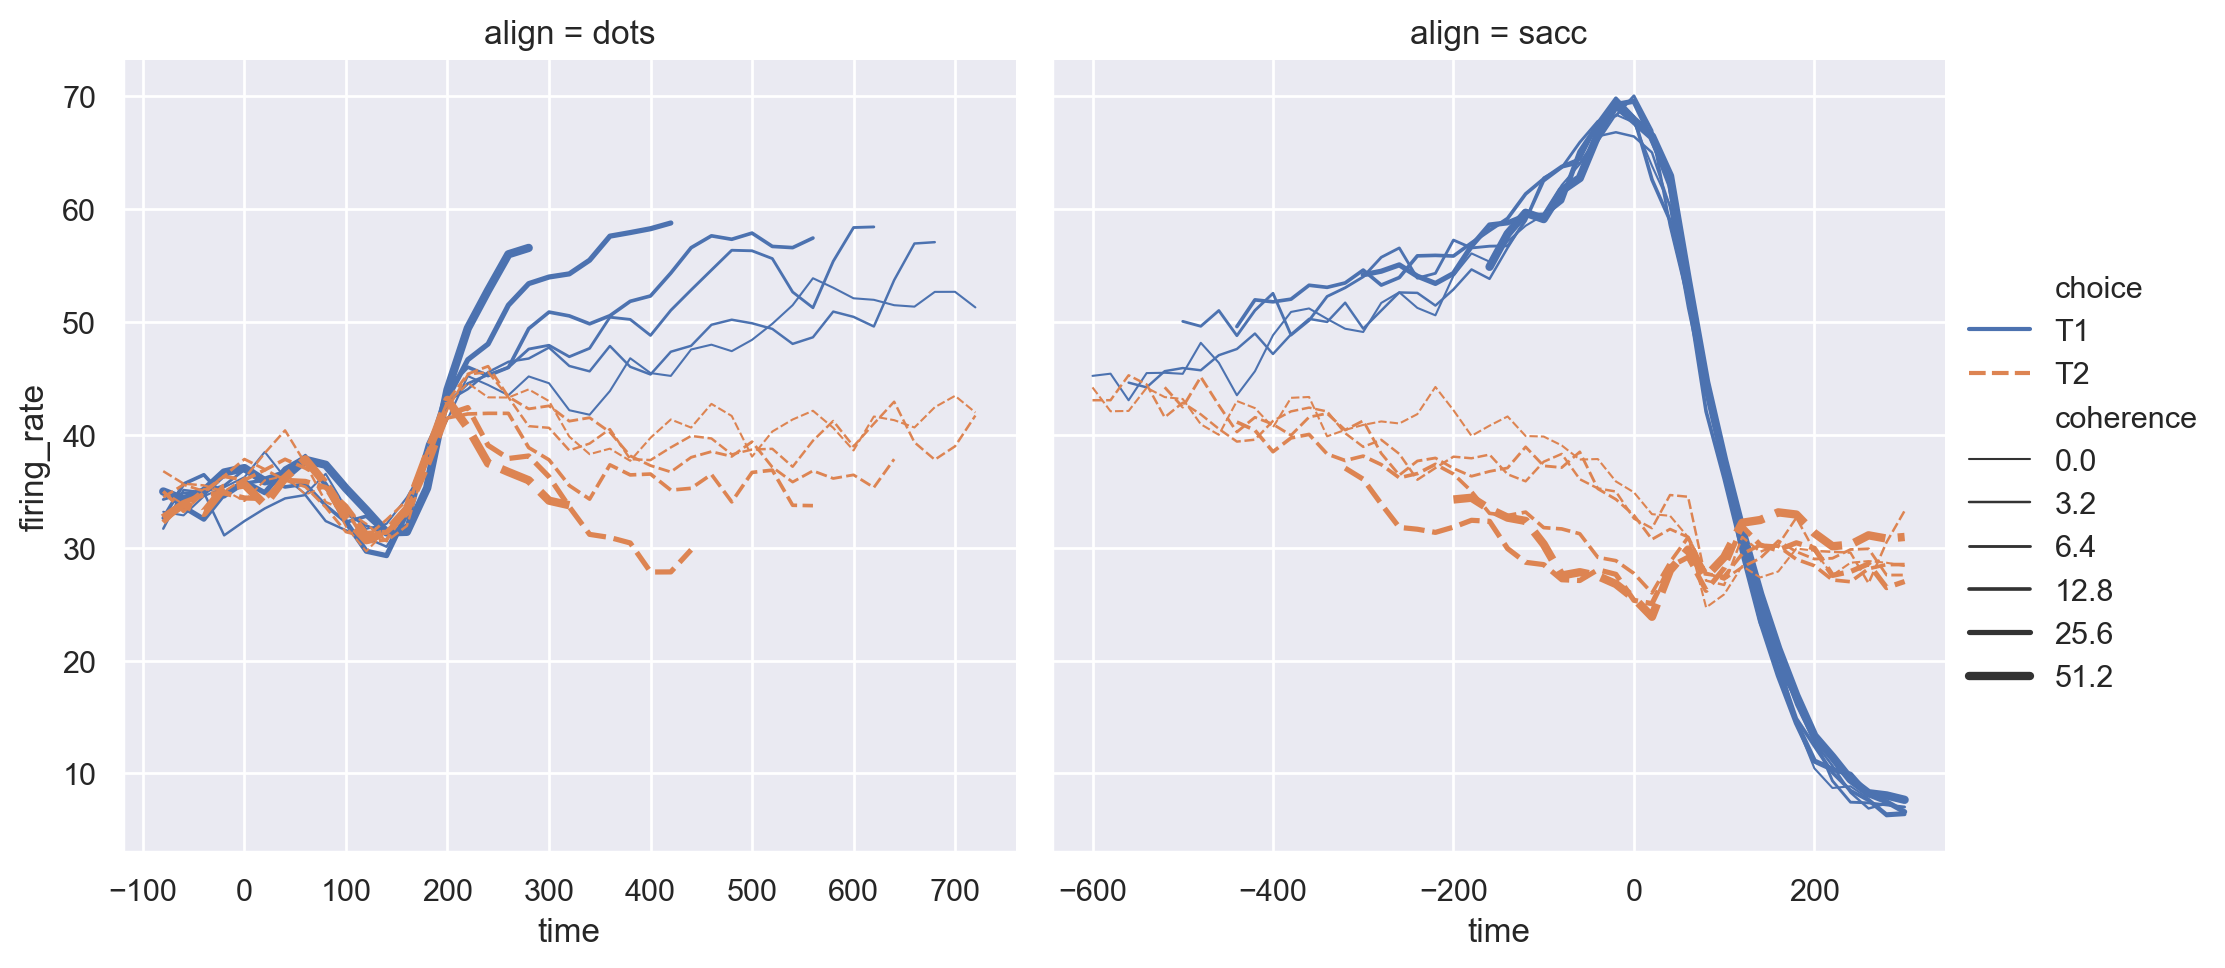

In [10]:
dots = sns.load_dataset("dots")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

Notice how the `size` and `style` parameters are used in both the scatter and line plots, but they affect the two visualizations differently: changing the marker area and symbol in the scatter plot vs the line width and dashing in the line plot. We did not need to keep those details in mind, letting us focus on the overall structure of the plot and the information we want it to convey.


## Statistical estimation

Often, we are interested in the *average* value of one variable as a function of other variables. Many seaborn functions will automatically perform the statistical estimation that is necessary to answer these questions:

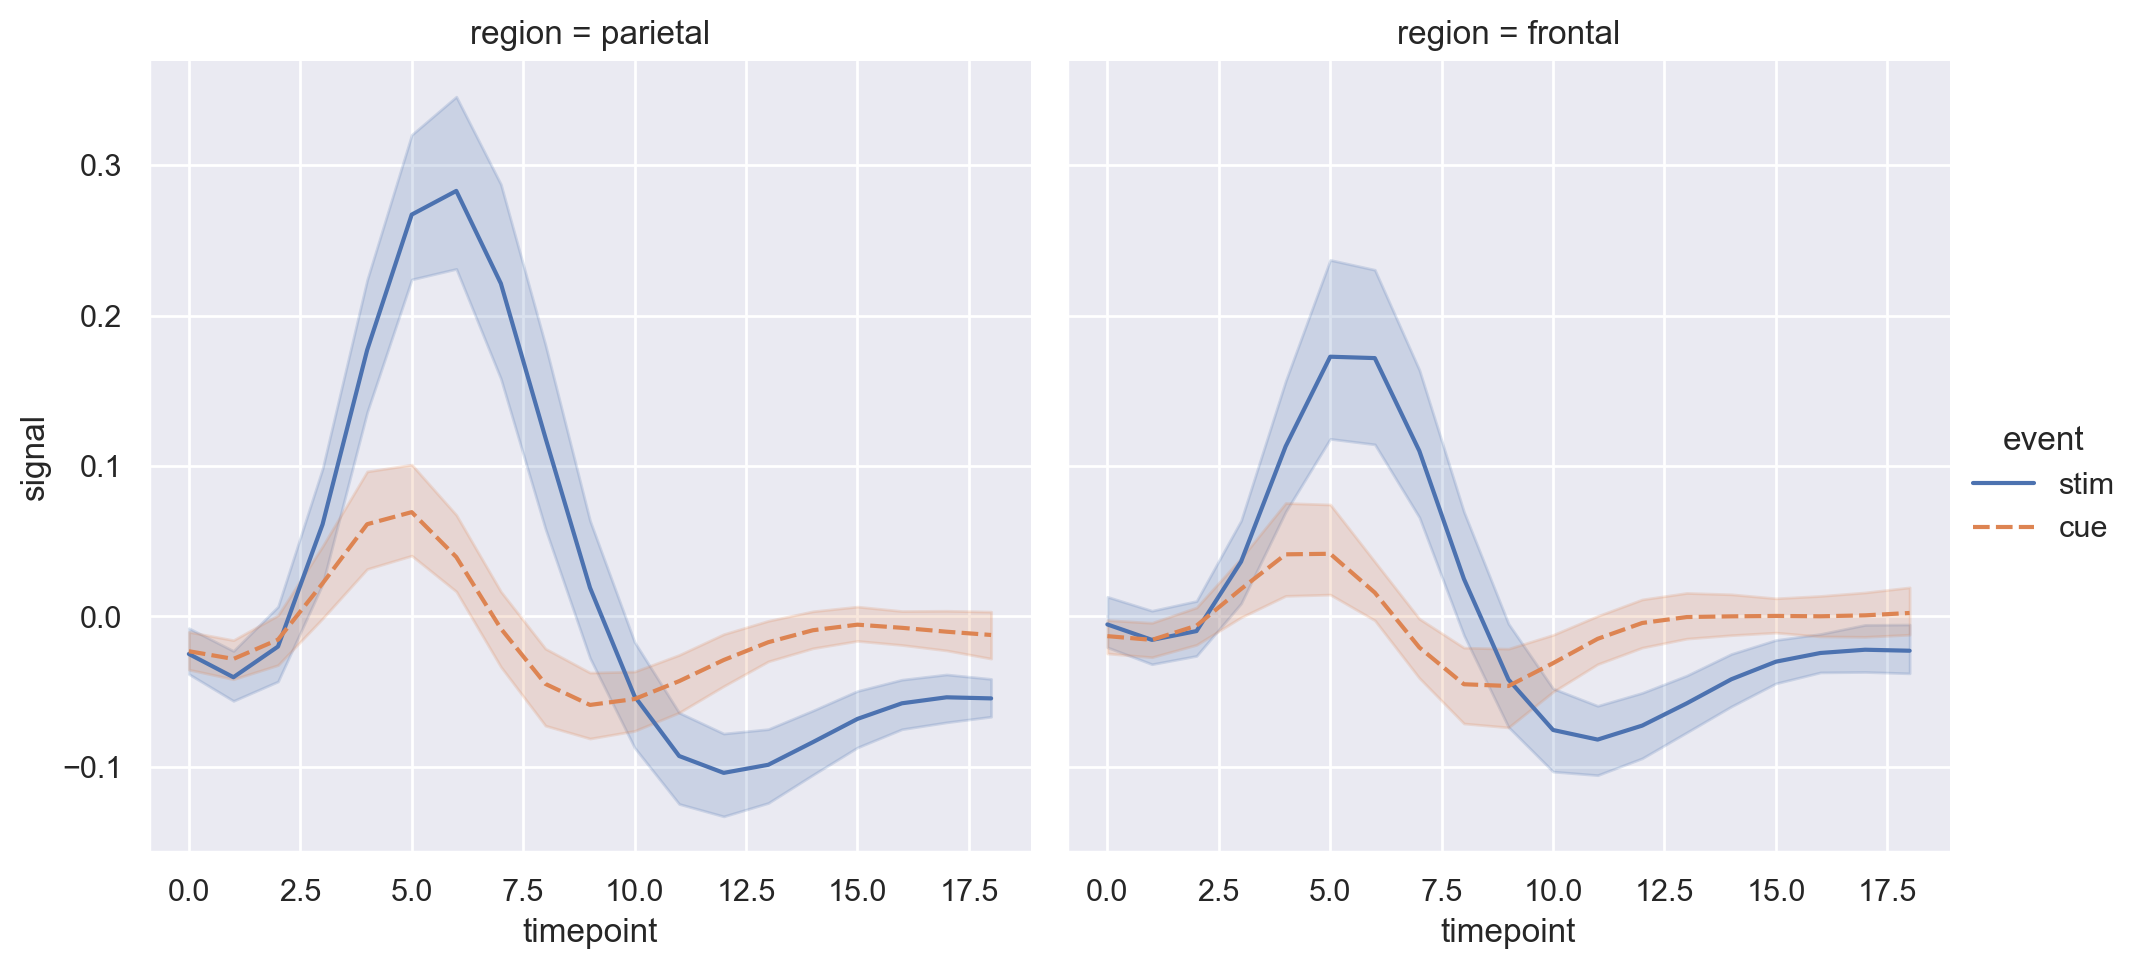

In [11]:
fmri = sns.load_dataset("fmri")
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

When statistical values are estimated, seaborn will use **bootstrapping** to compute confidence intervals and draw error bars representing the uncertainty of the estimate.

Statistical estimation in seaborn goes beyond descriptive statistics. For example, it is possible to enhance a scatterplot by including a linear regression model (and its uncertainty) using [`sns.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot):

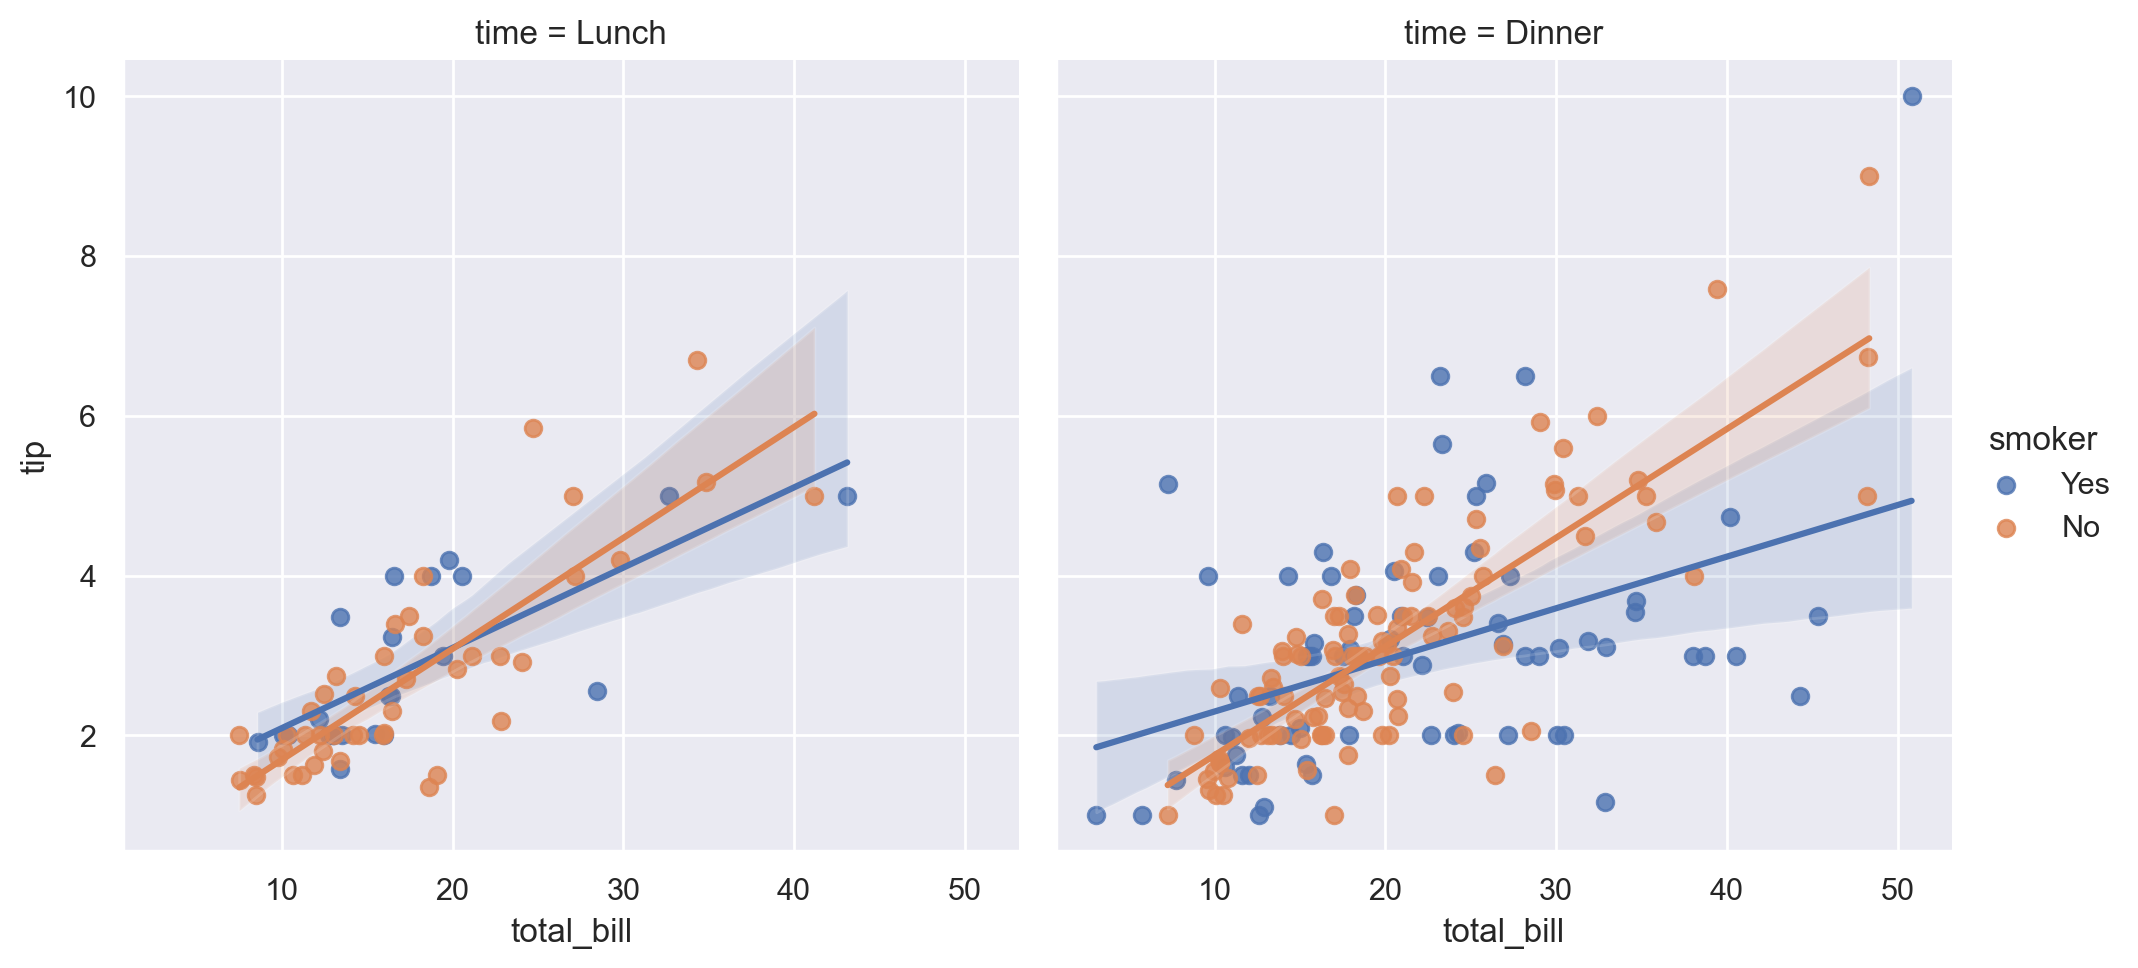

In [12]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

## Distributional representations

Statistical analyses require knowledge about the distribution of variables in your dataset. The seaborn function [`sns.distplot()`](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot) supports several approaches to visualizing distributions. These include classic techniques like histograms and computationally-intensive approaches like kernel density estimation:

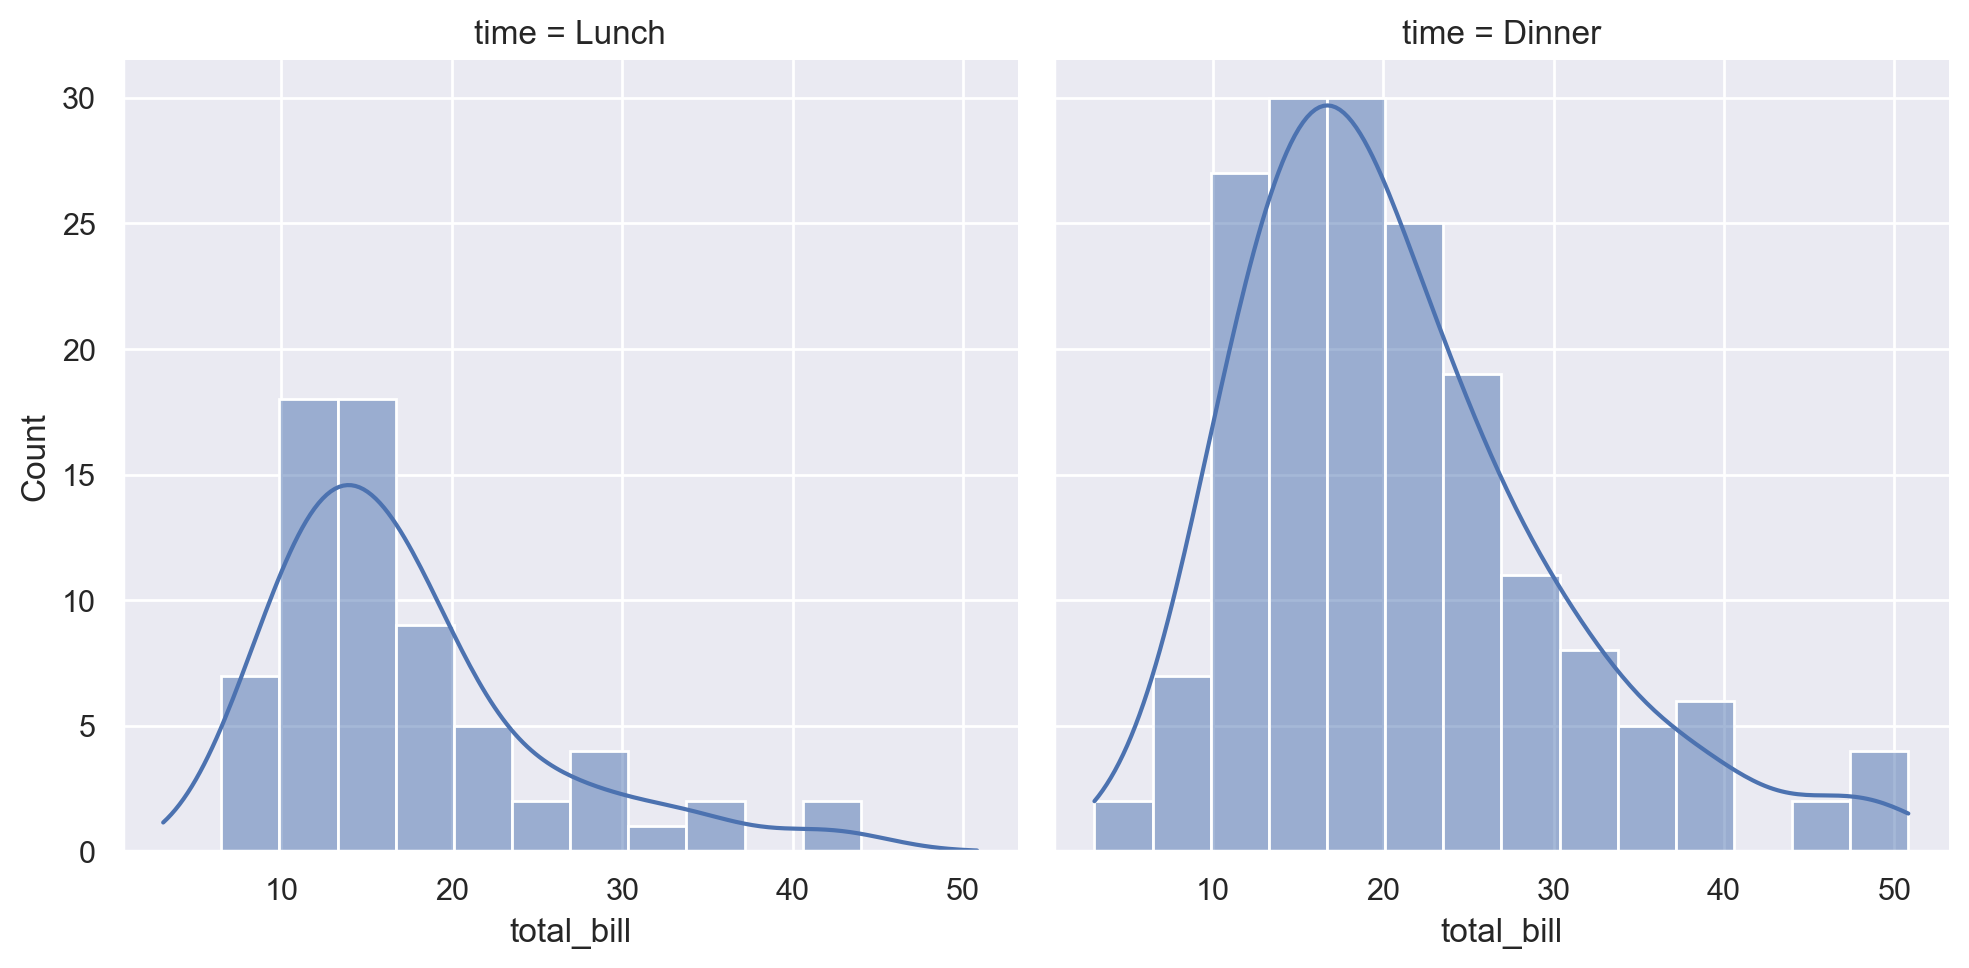

In [13]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)

Seaborn also tries to promote techniques that are powerful but less familiar, such as calculating and plotting the empirical cumulative distribution function of the data:

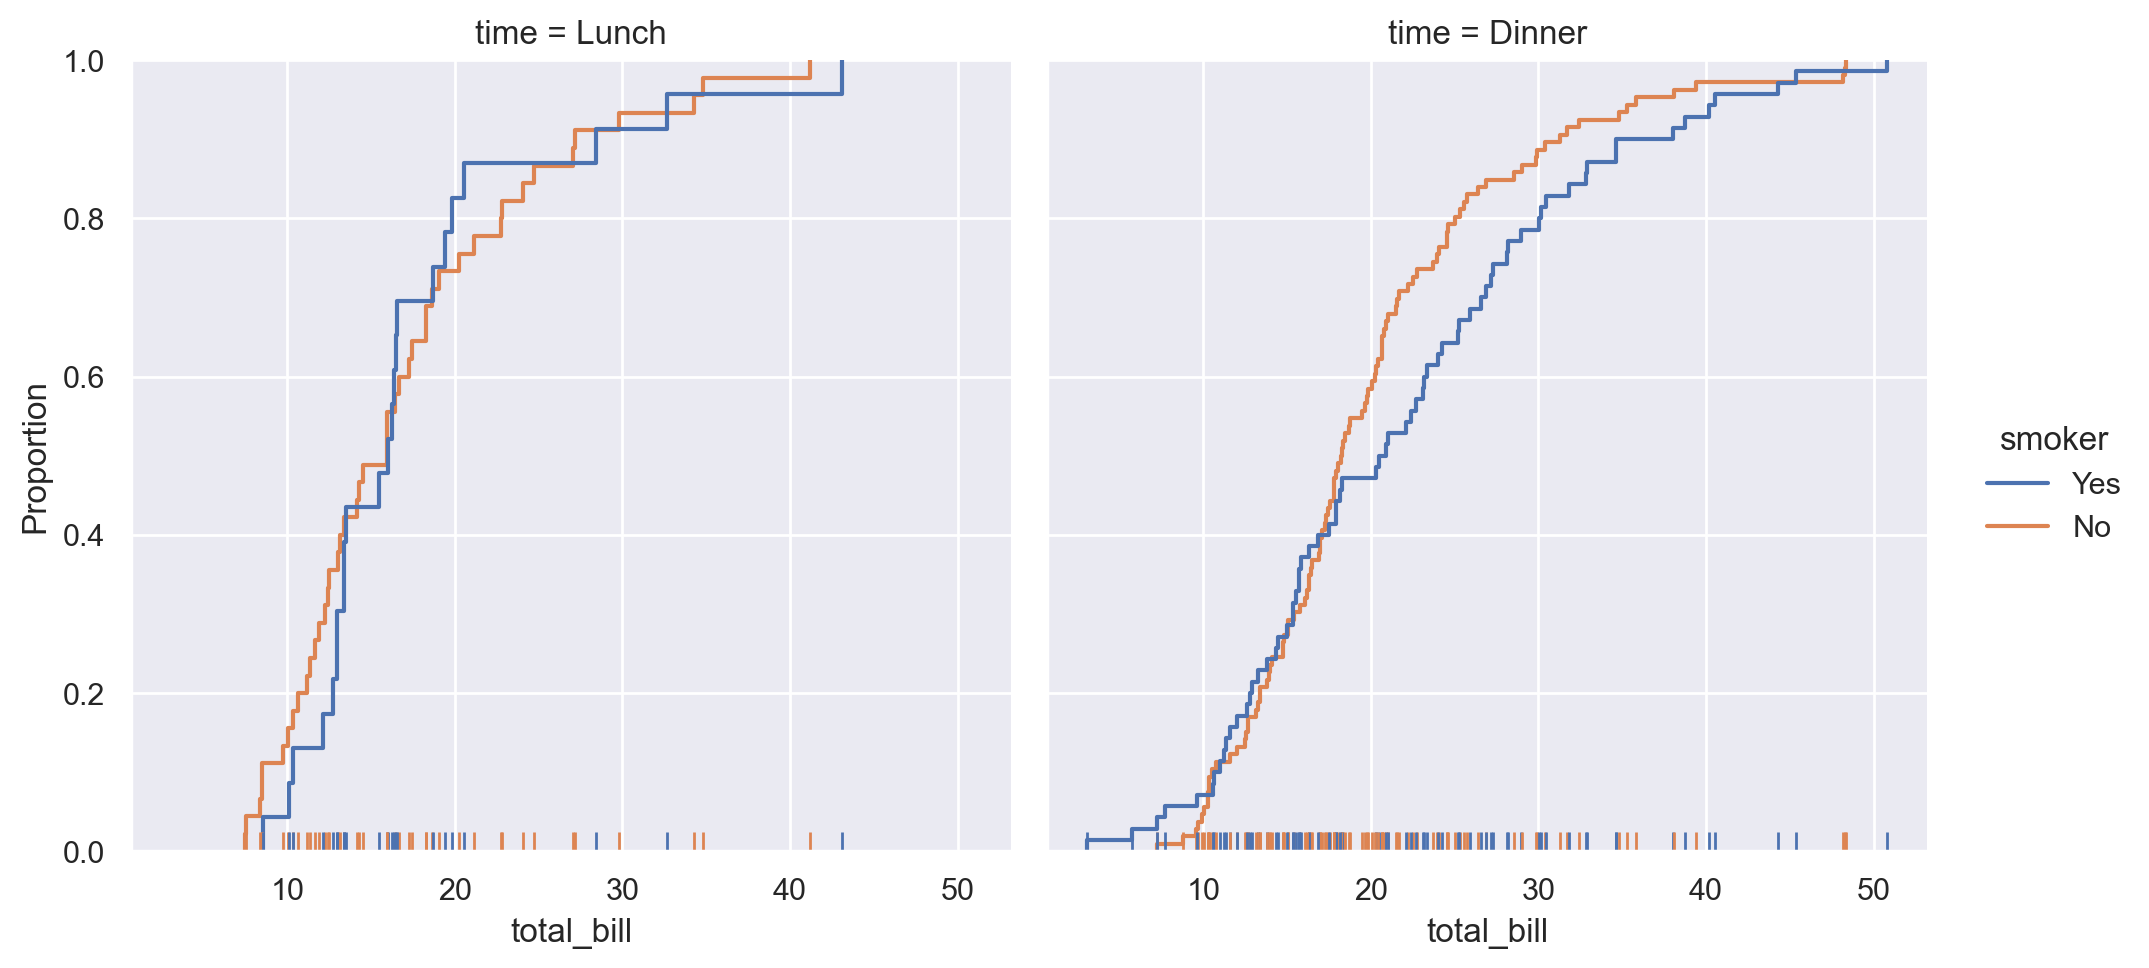

In [14]:
sns.displot(data=tips, kind="ecdf", x="total_bill", col="time", hue="smoker", rug=True)

## Plots for categorical data

Several specialized plot types in seaborn are oriented towards visualizing categorical data. They can be accessed through [`sns.catplot()`](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot). These plots offer different levels of granularity. At the finest level, you may wish to see every observation by drawing a "swarm" plot: a scatter plot that adjusts the positions of the points along the categorical axis so that they don't overlap:

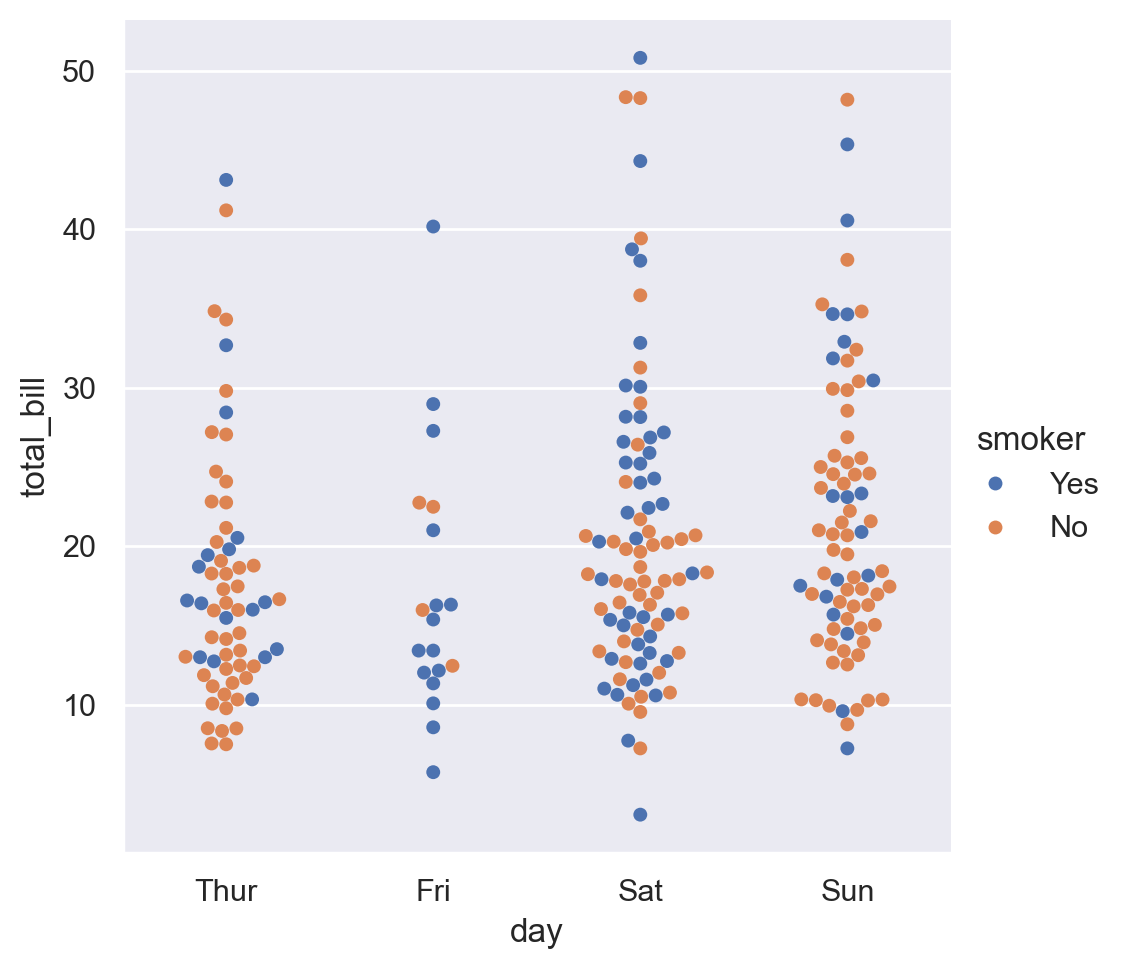

In [15]:
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")

Alternately, you could use kernel density estimation to represent the underlying distribution that the points are sampled from:

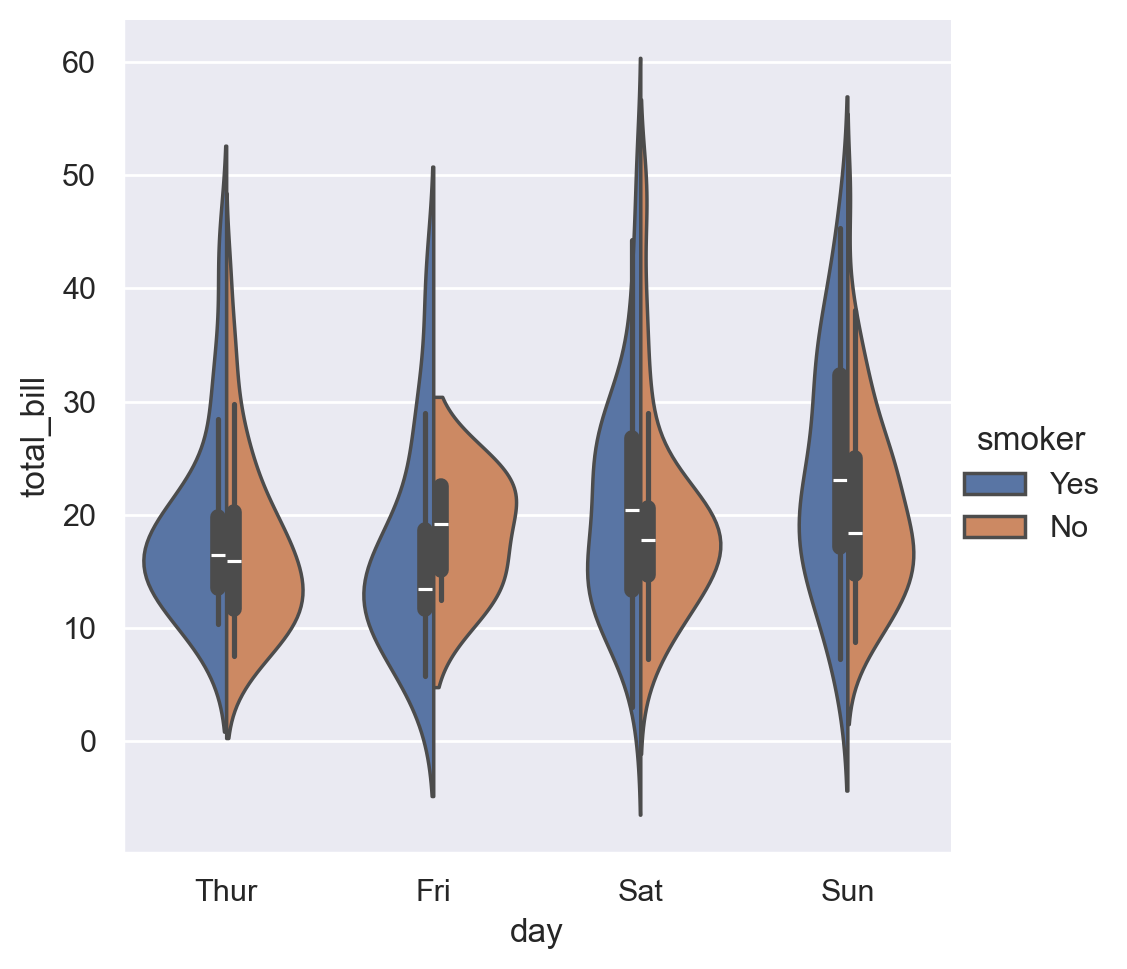

In [16]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)

Or you could show only the mean value and its confidence interval within each nested category:

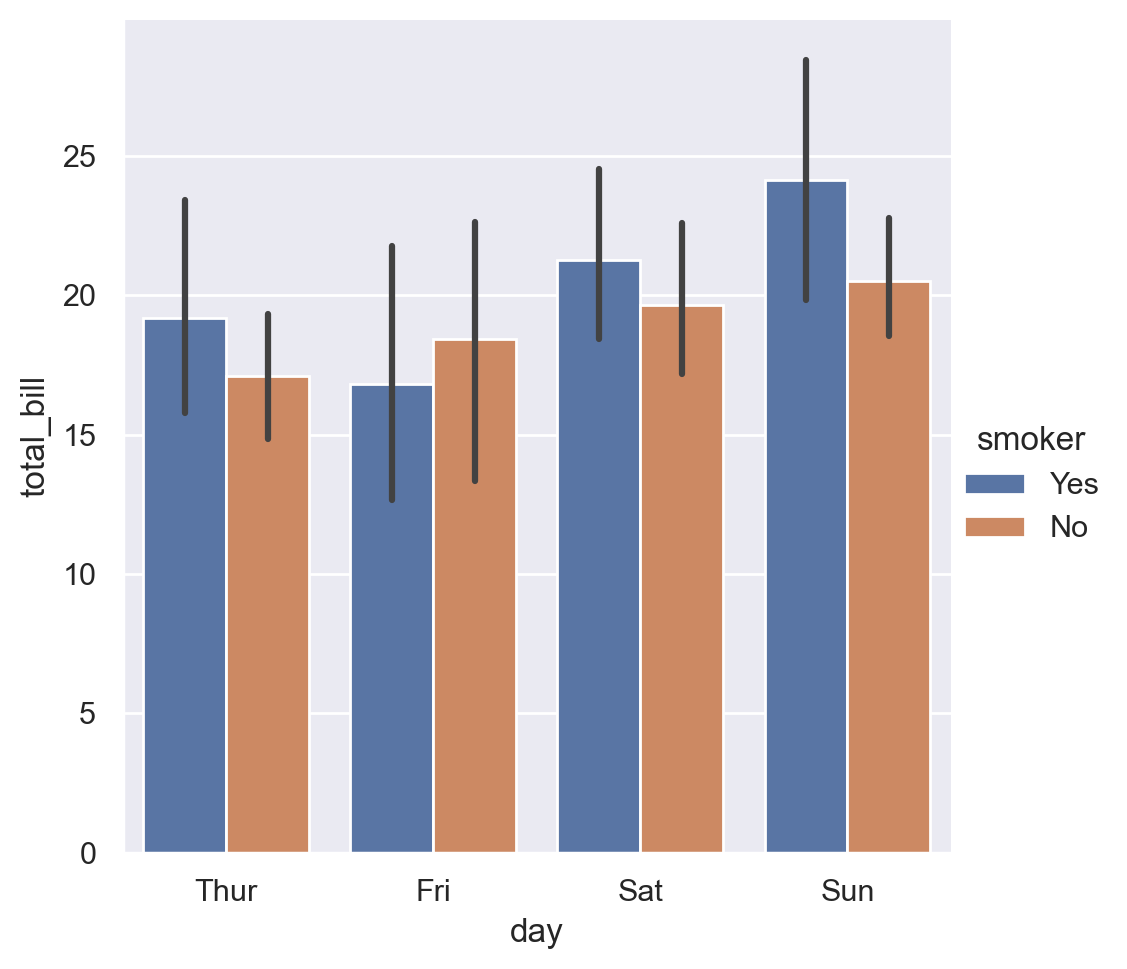

In [17]:
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker")

## Multivariate views on complex datasets

Some seaborn functions combine multiple kinds of plots to quickly give informative summaries of a dataset. One, [`sns.jointplot()`](https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot), focuses on a single relationship. It plots the joint distribution between two variables along with each variable's marginal distribution:

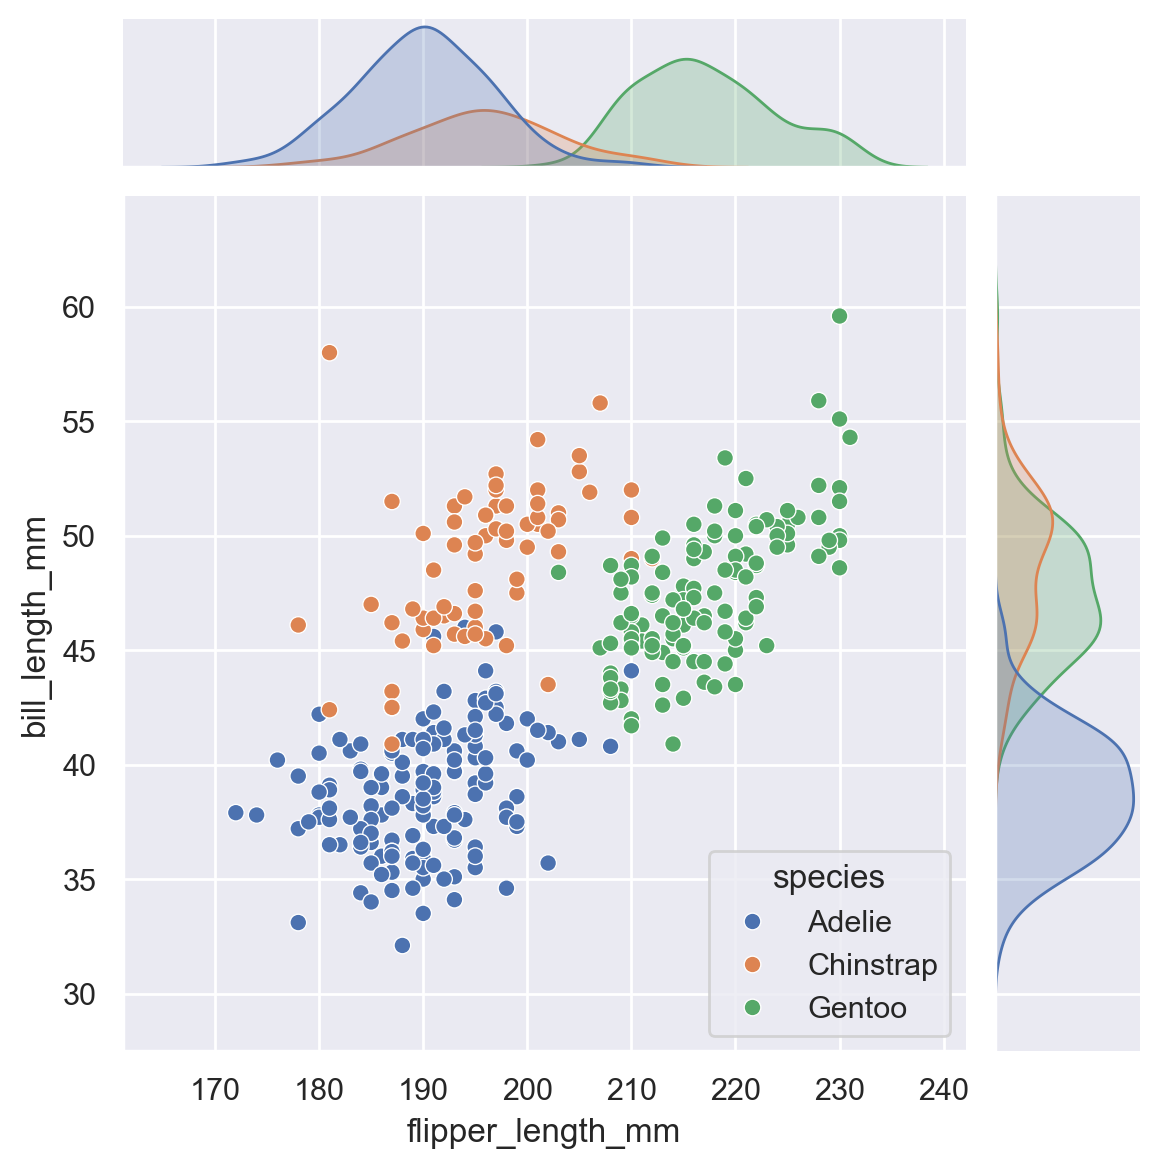

In [18]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

The other, [`sns.pairplot()`](https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot), takes a broader view: it shows joint and marginal distributions for all pairwise relationships and for each variable, respectively:

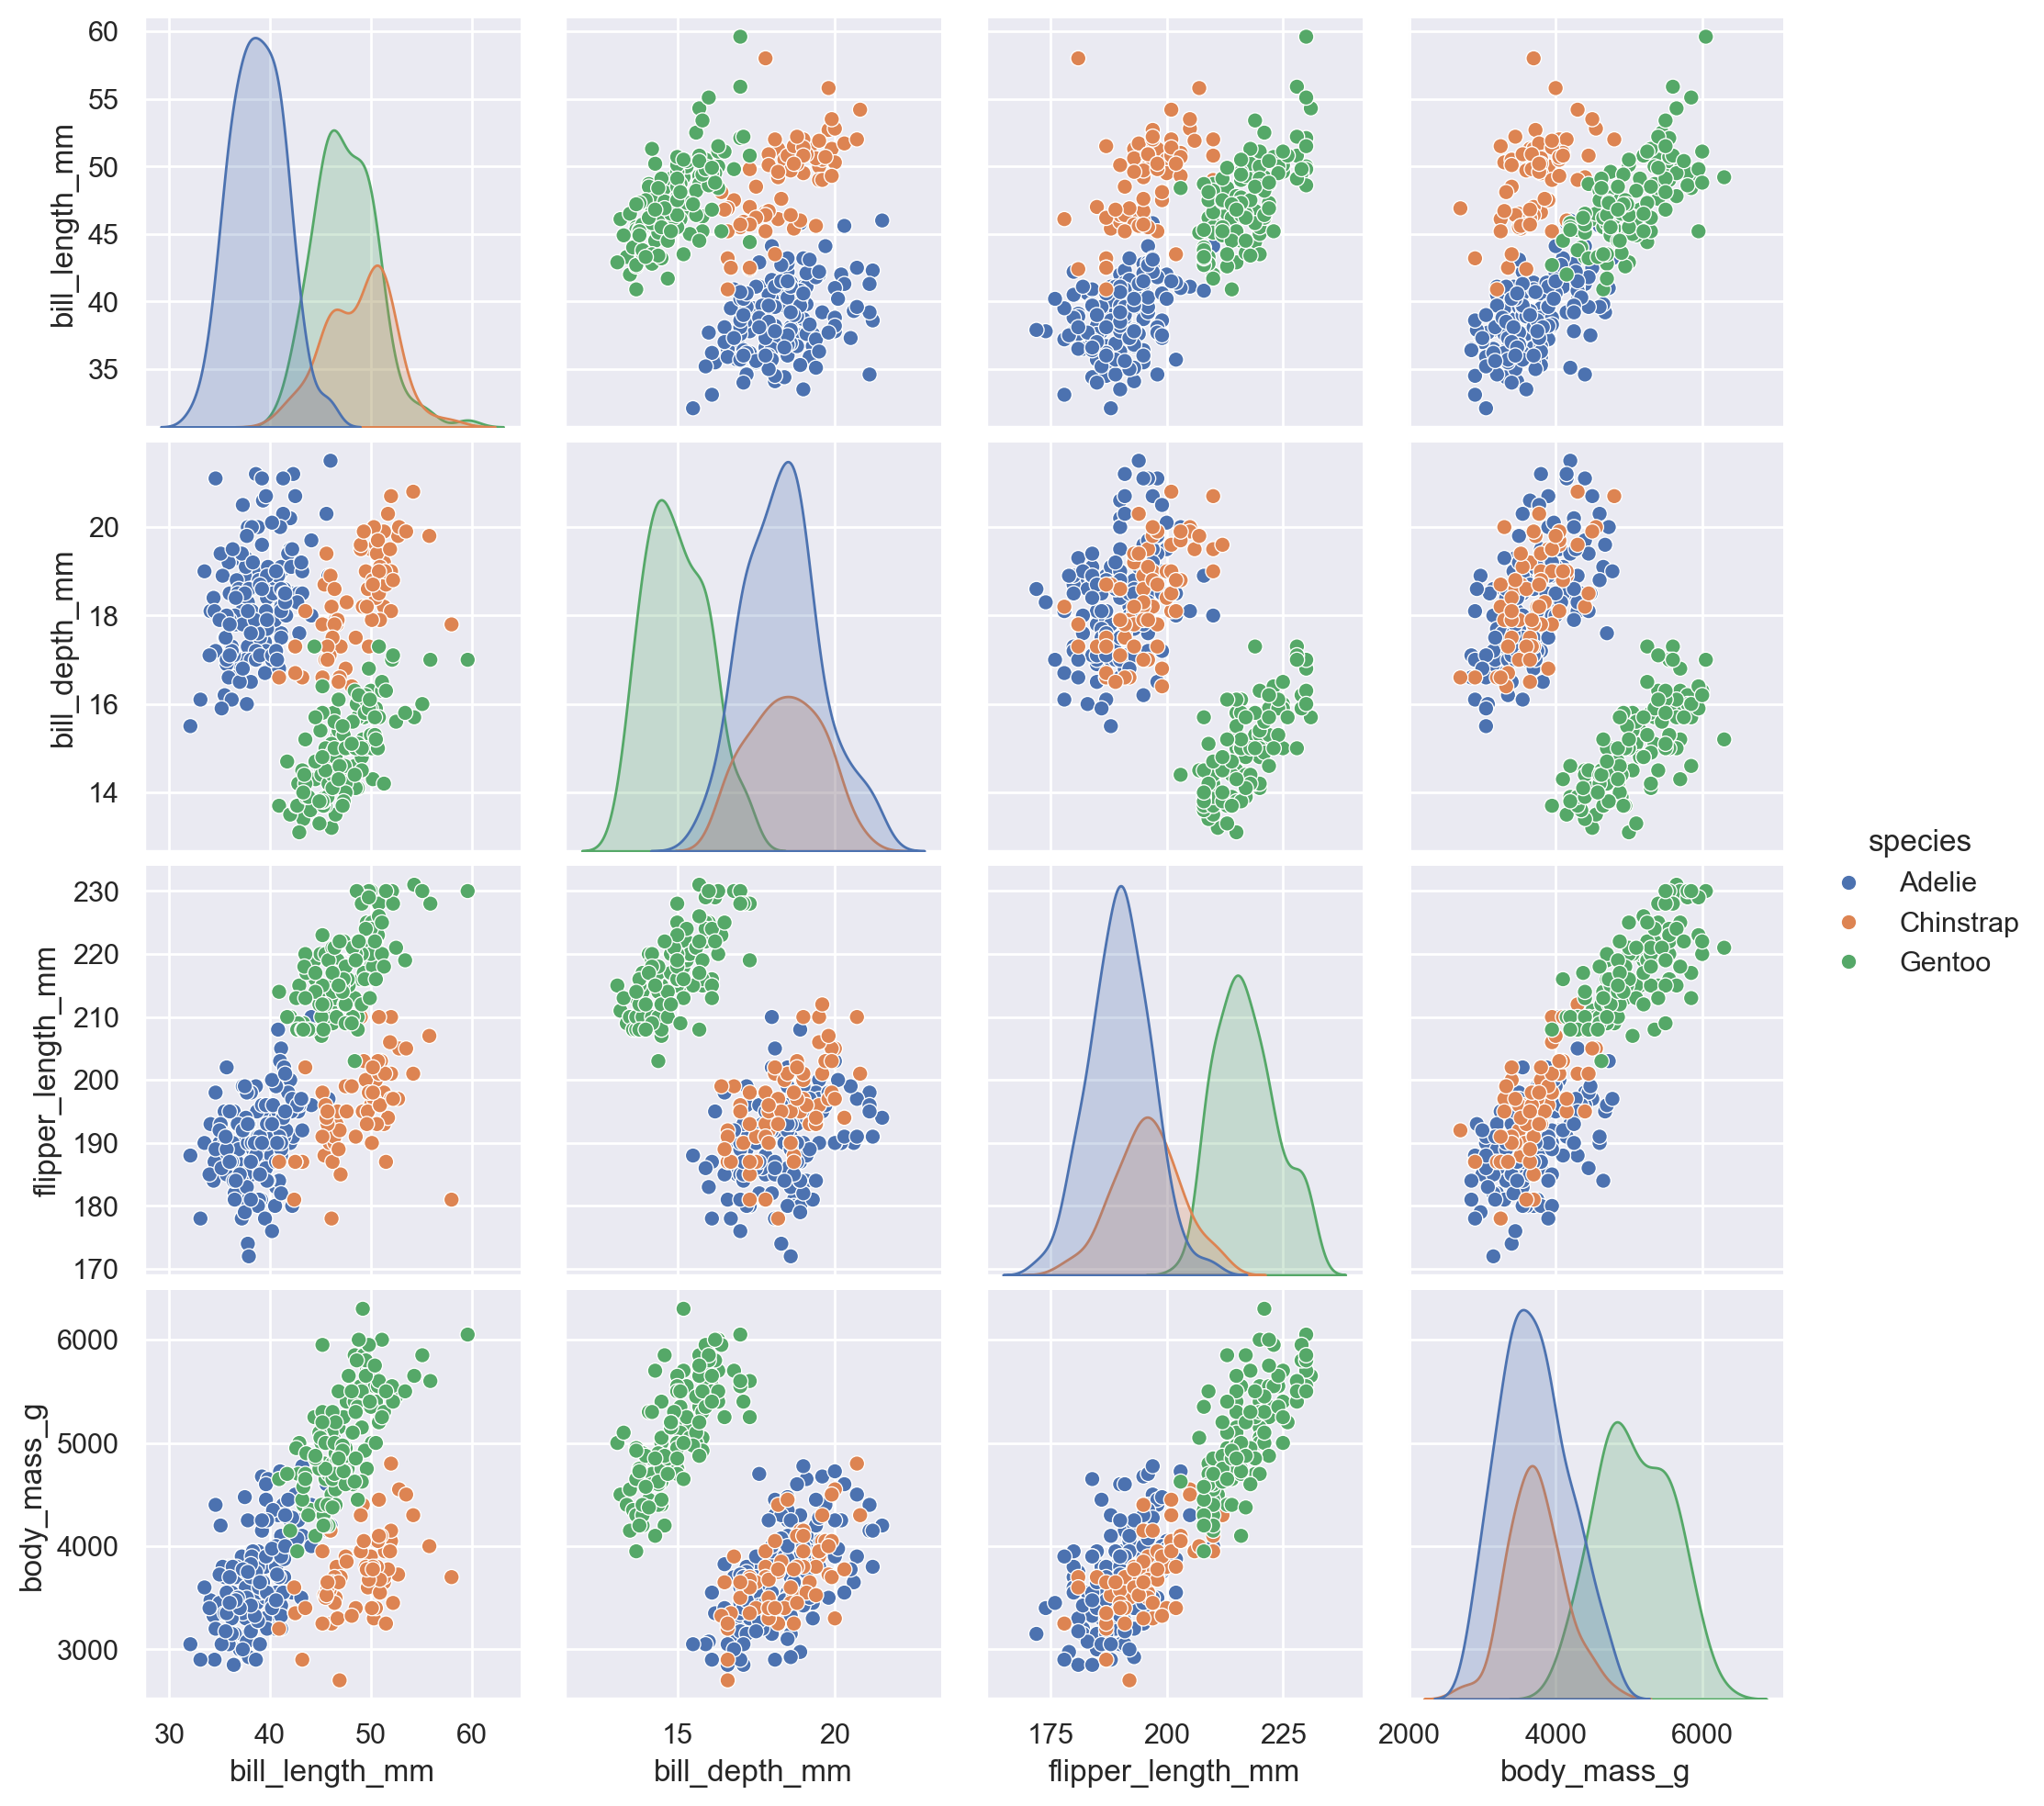

In [19]:
sns.pairplot(data=penguins, hue="species")

## Lower-level tools for building figures

These tools work by combining [axes-level](https://seaborn.pydata.org/tutorial/function_overview.html) plotting functions with objects that manage the layout of the figure, linking the structure of a dataset to a [grid of axes](https://seaborn.pydata.org/tutorial/axis_grids.html). 

Both elements are part of the public API, and you can use them directly to create complex figures with only a few more lines of code:

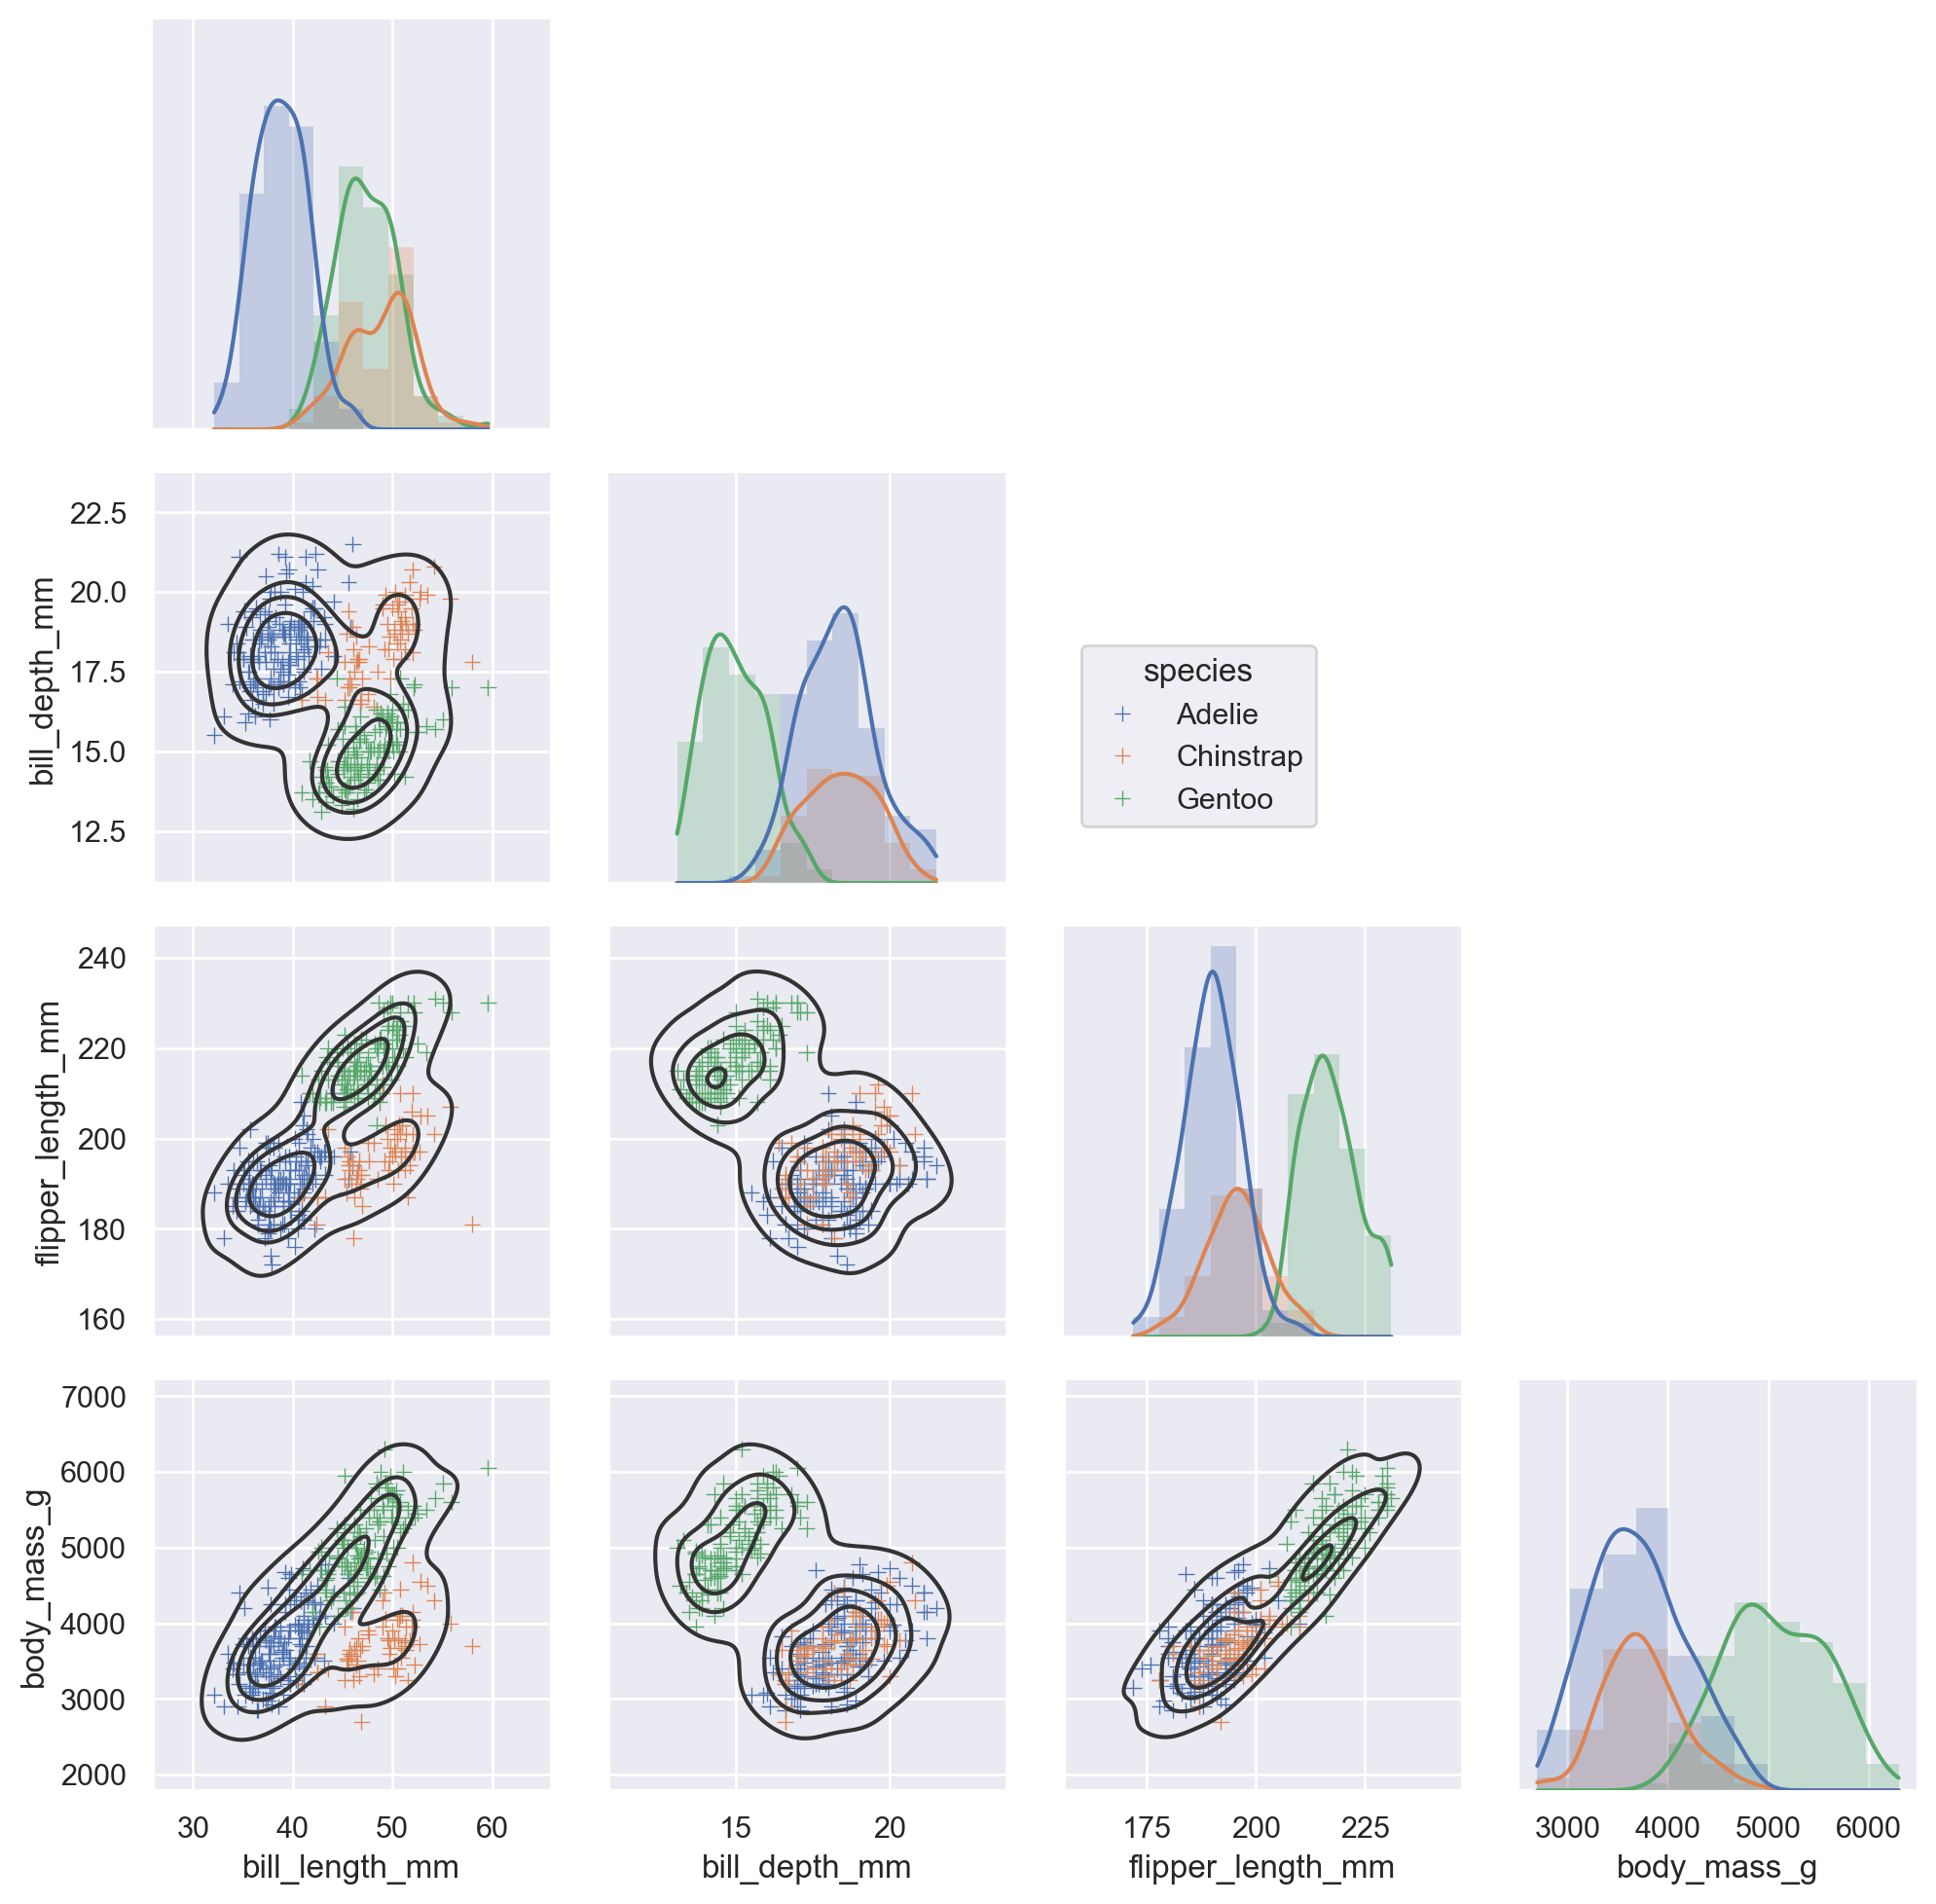

In [20]:
g = sns.PairGrid(penguins, hue="species", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

## Opinionated defaults and flexible customization

Seaborn creates complete graphics with a single function call: when possible, its functions will automatically add informative axis labels and legends that explain the semantic mappings in the plot.

In many cases, seaborn will also choose default values for its parameters based on characteristics of the data. For example, the [color mappings](https://seaborn.pydata.org/tutorial/color_palettes.html) that we have seen so far used distinct hues (blue, orange, and sometimes green) to represent different levels of the categorical variables assigned to `hue`. When mapping a numeric variable, some functions will switch to a continuous gradient:

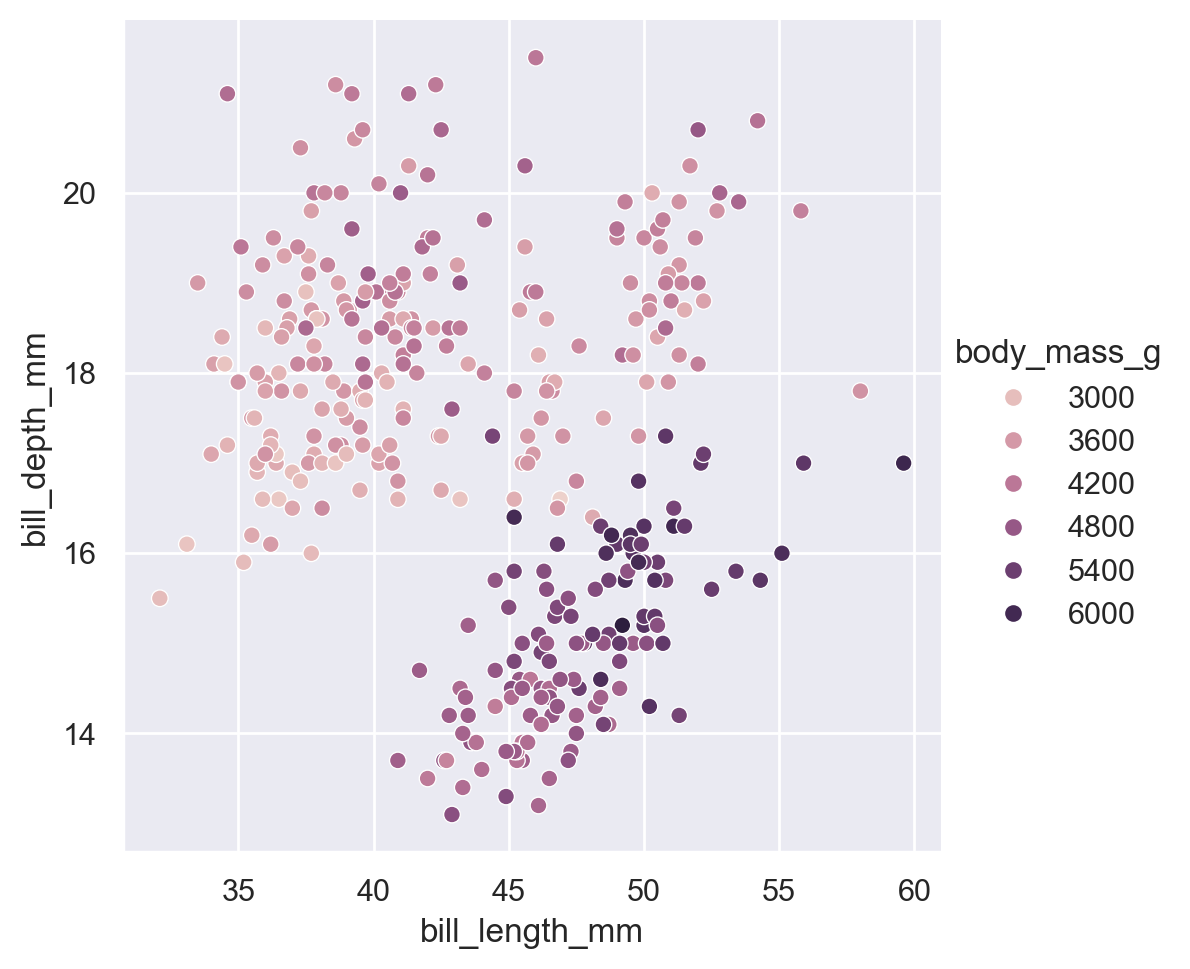

In [21]:
sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g"
)

When you're ready to share or publish your work, you'll probably want to polish the figure beyond what the defaults achieve. Seaborn allows for several levels of customization. It defines multiple built-in [themes](https://seaborn.pydata.org/tutorial/aesthetics.html) that apply to all figures, its functions have standardized parameters that can modify the semantic mappings for each plot, and additional keyword arguments are passed down to the underlying matplotlib artists, allowing even more control. Once you've created a plot, its properties can be modified through both the seaborn API and by dropping down to the matplotlib layer for fine-grained tweaking:

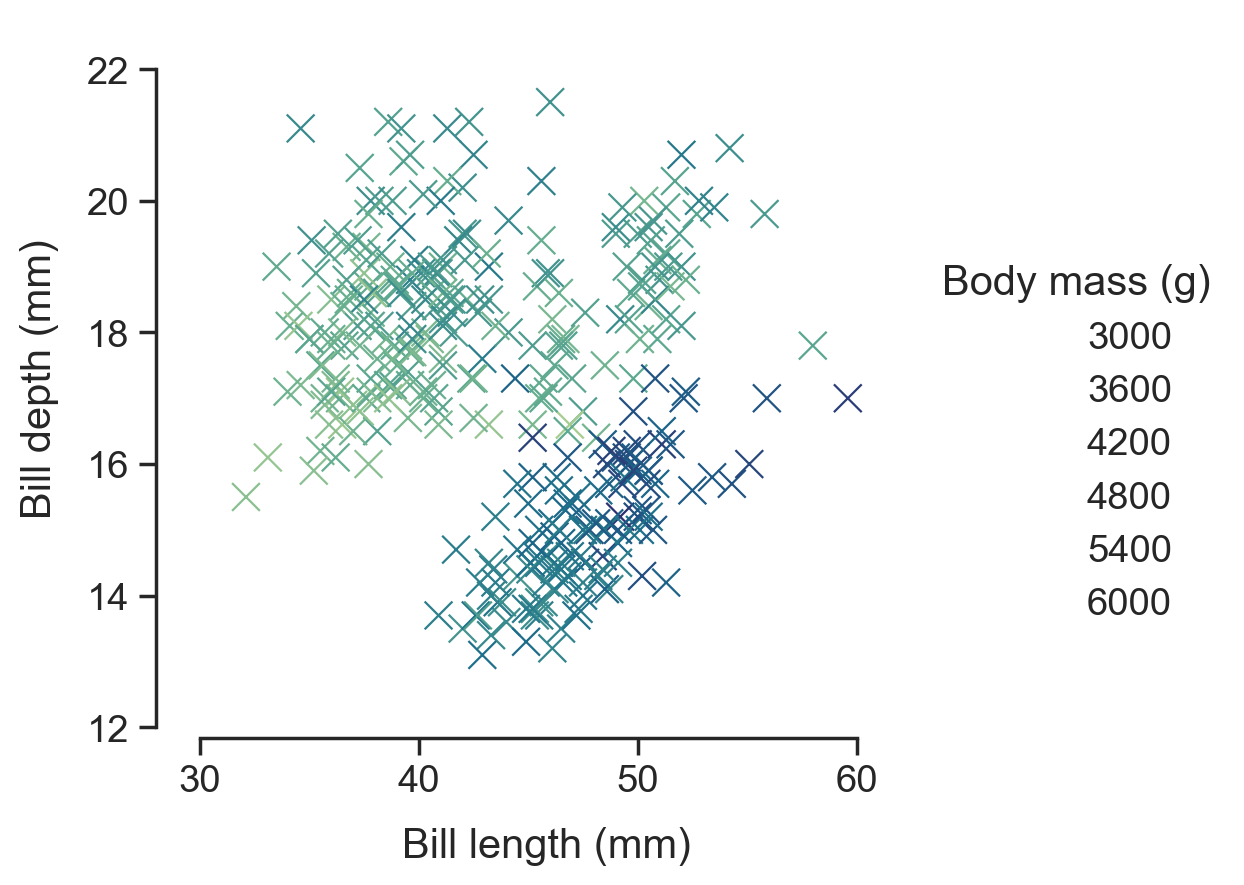

In [22]:
sns.set_theme(style="ticks", font_scale=1.25)
g = sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g",
    palette="crest", marker="x", s=100,
)
g.set_axis_labels("Bill length (mm)", "Bill depth (mm)", labelpad=10)
g.legend.set_title("Body mass (g)")
g.figure.set_size_inches(6.5, 4.5)
g.ax.margins(.15)
g.despine(trim=True)

### Relationship to matplotlib

Seaborn's integration with matplotlib allows you to use it across the many environments that matplotlib supports, including exploratory analysis in notebooks, real-time interaction in GUI applications, and archival output in a number of raster and vector formats.

While you can be productive using only seaborn functions, full customization of your graphics will require some knowledge of matplotlib's concepts and API. One aspect of the learning curve for new users of seaborn will be knowing when dropping down to the matplotlib layer is necessary to achieve a particular customization. On the other hand, users coming from matplotlib will find that much of their knowledge transfers.

Matplotlib has a comprehensive and powerful API; just about any attribute of the figure can be changed to your liking. A combination of seaborn's high-level interface and matplotlib's deep customizability will allow you both to quickly explore your data and to create graphics that can be tailored into a [publication quality](https://github.com/wagnerlabpapers/Waskom_PNAS_2017) final product.

### Next steps

Spend a few minutes checking out the  [example gallery](https://seaborn.pydata.org/examples/index.html) to get a broader sense for what kind of graphics seaborn can produce. 

If you have a specific plot in mind and want to know how to make it, you could check out the [API reference](https://seaborn.pydata.org/api.html), which documents each function's parameters and shows many examples to illustrate usage.

You can also check-out other pages in the official [user guide and tutorial](https://seaborn.pydata.org/tutorial.html) for a deeper discussion of the different tools and what they are designed to accomplish, then try some examples out in this notebook.

Otherwise you can move right onto `03_challenge.ipynb`!


In [ ]:
# Try some other plots out here; add more code-cells below as needed!